# Self-Driving Car Engineer Nanodegree

## Deep Learning

## Project: Build a Traffic Sign Recognition Classifier

In this notebook, a template is provided for you to implement your functionality in stages, which is required to successfully complete this project. If additional code is required that cannot be included in the notebook, be sure that the Python code is successfully imported and included in your submission if necessary. 

> **Note**: Once you have completed all of the code implementations, you need to finalize your work by exporting the iPython Notebook as an HTML document. Before exporting the notebook to html, all of the code cells need to have been run so that reviewers can see the final implementation and output. You can then export the notebook by using the menu above and navigating to  \n",
    "**File -> Download as -> HTML (.html)**. Include the finished document along with this notebook as your submission. 

In addition to implementing code, there is a writeup to complete. The writeup should be completed in a separate file, which can be either a markdown file or a pdf document. There is a [write up template](https://github.com/udacity/CarND-Traffic-Sign-Classifier-Project/blob/master/writeup_template.md) that can be used to guide the writing process. Completing the code template and writeup template will cover all of the [rubric points](https://review.udacity.com/#!/rubrics/481/view) for this project.

The [rubric](https://review.udacity.com/#!/rubrics/481/view) contains "Stand Out Suggestions" for enhancing the project beyond the minimum requirements. The stand out suggestions are optional. If you decide to pursue the "stand out suggestions", you can include the code in this Ipython notebook and also discuss the results in the writeup file.


>**Note:** Code and Markdown cells can be executed using the **Shift + Enter** keyboard shortcut. In addition, Markdown cells can be edited by typically double-clicking the cell to enter edit mode.

---
## Step 0: Load The Data

In [15]:
# Load pickled data
import pickle

# TODO: Fill this in based on where you saved the training and testing data

training_file = './Training_set/train.p'
validation_file= './Training_set/valid.p'
testing_file = './Training_set/test.p'

with open(training_file, mode='rb') as f:
    train = pickle.load(f)
with open(validation_file, mode='rb') as f:
    valid = pickle.load(f)
with open(testing_file, mode='rb') as f:
    test = pickle.load(f)
    
X_train, y_train = train['features'], train['labels']
X_valid, y_valid = valid['features'], valid['labels']
X_test, y_test = test['features'], test['labels']

print(len(X_train), X_train.shape)
print(len(X_valid))
print(len(X_test))

# https://github.com/topgoonr/CarND-Traffic-Sign-Classifier-Project/blob/master/Traffic_Sign_Classifier.ipynb
# https://github.com/jinchenglee/CarND-Traffic-Sign-Classifier-Project

34799 (34799, 32, 32, 3)
4410
12630


---

## Step 1: Dataset Summary & Exploration

The pickled data is a dictionary with 4 key/value pairs:

- `'features'` is a 4D array containing raw pixel data of the traffic sign images, (num examples, width, height, channels).
- `'labels'` is a 1D array containing the label/class id of the traffic sign. The file `signnames.csv` contains id -> name mappings for each id.
- `'sizes'` is a list containing tuples, (width, height) representing the original width and height the image.
- `'coords'` is a list containing tuples, (x1, y1, x2, y2) representing coordinates of a bounding box around the sign in the image. **THESE COORDINATES ASSUME THE ORIGINAL IMAGE. THE PICKLED DATA CONTAINS RESIZED VERSIONS (32 by 32) OF THESE IMAGES**

Complete the basic data summary below. Use python, numpy and/or pandas methods to calculate the data summary rather than hard coding the results. For example, the [pandas shape method](http://pandas.pydata.org/pandas-docs/stable/generated/pandas.DataFrame.shape.html) might be useful for calculating some of the summary results. 

### Provide a Basic Summary of the Data Set Using Python, Numpy and/or Pandas

In [16]:
### Replace each question mark with the appropriate value. 
### Use python, pandas or numpy methods rather than hard coding the results

# TODO: Number of training examples
n_train = len(X_train)

# TODO: Number of validation examples
n_validation = len(X_valid)

# TODO: Number of testing examples.
n_test = len(X_test)

# TODO: What's the shape of an traffic sign image?
image_shape = X_train[0].shape

# TODO: How many unique classes/labels there are in the dataset.
n_classes = len(set(y_train))

print("Number of training examples =", n_train)
print("Number of testing examples =", n_test)
print("Image data shape =", image_shape)
print("Number of classes =", n_classes)

Number of training examples = 34799
Number of testing examples = 12630
Image data shape = (32, 32, 3)
Number of classes = 43


### Include an exploratory visualization of the dataset

Visualize the German Traffic Signs Dataset using the pickled file(s). This is open ended, suggestions include: plotting traffic sign images, plotting the count of each sign, etc. 

The [Matplotlib](http://matplotlib.org/) [examples](http://matplotlib.org/examples/index.html) and [gallery](http://matplotlib.org/gallery.html) pages are a great resource for doing visualizations in Python.

**NOTE:** It's recommended you start with something simple first. If you wish to do more, come back to it after you've completed the rest of the sections. It can be interesting to look at the distribution of classes in the training, validation and test set. Is the distribution the same? Are there more examples of some classes than others?

dict_items([(41, 210), (31, 690), (36, 330), (26, 540), (23, 450), (1, 1980), (40, 300), (22, 330), (37, 180), (16, 360), (3, 1260), (19, 180), (4, 1770), (11, 1170), (42, 210), (0, 180), (32, 210), (27, 210), (29, 240), (24, 240), (9, 1320), (5, 1650), (38, 1860), (8, 1260), (10, 1800), (35, 1080), (34, 360), (18, 1080), (6, 360), (13, 1920), (7, 1290), (30, 390), (39, 270), (21, 270), (20, 300), (33, 599), (28, 480), (12, 1890), (14, 690), (15, 540), (17, 990), (2, 2010), (25, 1350)])


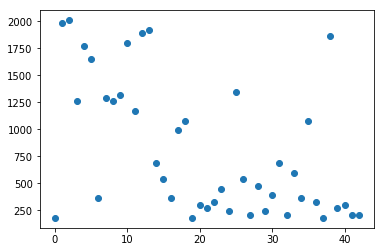

max freq    =  2010
min freq    =  180
upperlimit =  2010
sum of all frequencies =  34799
mean        =  809.2790697674419
max perturbations required =  11


In [17]:
### Data exploration visualization code goes here.
### Feel free to use as many code cells as needed.
import matplotlib.pyplot as plt
from collections import Counter
import numpy as np

labels = y_train
c = Counter(labels)
print(c.items())

signal = []
count = []

for v in c.values():
    count.append([v])

for w in c.keys():
    signal.append([w])
    

plt.plot(signal,count, 'o')
plt.show()
# Visualizations will be shown in the notebook.

def maxfreq(y_train, n_class):
    counts = []
    for i in range(n_class):
        counts.append(np.sum(y_train == i))
    return max(counts)

def minfreq(y_train, n_class):
    counts = []
    for i in range(n_class):
        counts.append(np.sum(y_train == i))
    return min(counts)

def sumfreq(y_train, n_class):
    counts = []
    for i in range(n_class):
        counts.append(np.sum(y_train == i))
    return sum(counts)

maxf = maxfreq(y_train, 43) 
minf = minfreq(y_train, 43) 
gap = maxf - minf
## UPPERLIMIT = gap
UPPERLIMIT = maxf
sumfreq = sumfreq(y_train, 43)

print('max freq    = ', maxf)
print('min freq    = ', minf)
print ('upperlimit = ', UPPERLIMIT)
print('sum of all frequencies = ', sumfreq)

training_mean = (sumfreq/n_classes)  ## --> get the mean count
print('mean        = ', training_mean)

maxperturb = UPPERLIMIT // minf 
print('max perturbations required = ', maxperturb)

before augmentation...


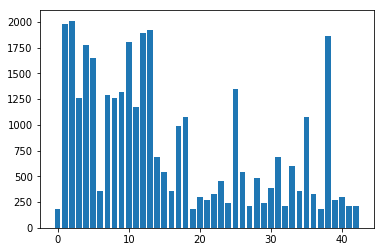

In [18]:

def display_data(y_train, n_class):
    counts = []
    for i in range(n_class):
        counts.append(np.sum(y_train == i))
    plt.bar(range(43),counts)
    
print('before augmentation...')    
display_data(y_train, 43)

In [19]:
## let us try to normalize by trying to fill in the whitespace in the bar graph shown above

## to fill the bar graph 

## Note:  allspace  = whitespace + bar_space
bar_space = sumfreq
allspace = maxf * n_classes 
whitespace = allspace - bar_space
print('allspace   = ', allspace)
print('bar_space  = ', bar_space)
print('whitespace = ', whitespace)

allspace   =  86430
bar_space  =  34799
whitespace =  51631


35
41
31
36


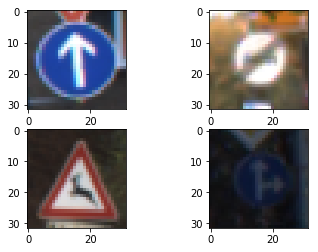

In [20]:
### To check how the images look like
import random

index = random.randint(0, len(X_train))
image = X_train[index].squeeze()

plt.subplot(221)
plt.imshow(image)
print(y_train[index])

plt.subplot(222)
plt.imshow(X_train[121])
print(y_train[121])

plt.subplot(223)
plt.imshow(X_train[502])
print(y_train[502])

plt.subplot(224)
plt.imshow(X_train[1000])
print(y_train[1000])

# plt.subplot(224)
# plt.imshow(X_train[10000])
# print(y_train[10000])

In [52]:
import cv2
import matplotlib.gridspec as gridspec
## to add to the training set by creating jittered versions of the training
## and expanding upon the training set.

## refer to this paper: http://yann.lecun.com/exdb/publis/pdf/sermanet-ijcnn-11.pdf

## PRE-PROCESSING 

## transformation  code only in this cell courtesy https://github.com/vxy10/ImageAugmentation
## the author's blog is here: https://chatbotslife.com/german-sign-classification-using-deep-learning-neural-networks-98-8-solution-d05656bf51ad
## as recommended by Subodh Malgonde in the forum: 

## angular transformation: [-15, 15] as described in LeCun's paper


rows,cols,ch = image.shape

def rotate_image(img, ang_range=30):
    ## ang_range: Range of angles for rotation
    ang_rot = np.random.uniform(ang_range)-ang_range/2
    #print(ang_rot)
    Rot_M = cv2.getRotationMatrix2D((cols/2,rows/2),ang_rot,1)
    rotated_image = cv2.warpAffine(img,Rot_M,(cols,rows))
    return rotated_image

def translate_image(img, trans_range=5):
    tr_x = trans_range*np.random.uniform()-trans_range/2
    tr_y = trans_range*np.random.uniform()-trans_range/2
    Trans_M = np.float32([[1,0,tr_x],[0,1,tr_y]])
    translated_image = cv2.warpAffine(img,Trans_M,(cols,rows))
    return translated_image

def shear_image(img, shear_range=5):
    ## shear_range: Range of values to apply affine transform to
    ## http://opencv-python-tutroals.readthedocs.io/en/latest/py_tutorials/py_imgproc/py_geometric_transformations/py_geometric_transformations.html#affine-transformation
   
    pts1 = np.float32([[5,5],[20,5],[5,20]])

    pt1 = 5+shear_range*np.random.uniform()-shear_range/2
    pt2 = 20+shear_range*np.random.uniform()-shear_range/2

    pts2 = np.float32([[pt1,5],[pt2,pt1],[5,pt2]])
    shear_M = cv2.getAffineTransform(pts1,pts2)
    shear_image = cv2.warpAffine(img,shear_M,(cols,rows))
    return shear_image

def resize_image(image, resize_range):
    pass
    ##resized_image = 
    ## https://stackoverflow.com/questions/4195453/how-to-resize-an-image-with-opencv2-0-and-python2-6
    ## dst = cv2.resize(src, None, fx = 2, fy = 2, interpolation = cv2.INTER_CUBIC)
    ## may not implement here

def alter_brightness(img, lightscalar=40, brighten=False):
    image1 = np.copy(img)
    ## if np.mean(img)
    if not brighten:
        lightscalar = (lightscalar * 2 * np.random.uniform()) - lightscalar
    else: 
        lightscalar = (lightscalar * 2 * np.random.uniform()) 
    
    image1 = image1.astype(np.float32) + lightscalar
    image1 = np.maximum(0, image1)
    image1 = np.minimum(255, image1)
    return image1.astype(np.uint8)
    


def brighten_image(img):
    return alter_brightness(img, brighten=True)
#plt.imshow(image);
#plt.imshow(rotated_image);
#plt.axis('off');



def get_ycrcb(img):
    newimg = cv2.cvtColor(img, cv2.COLOR_RGB2YCR_CB)
    return newimg

def get_rgb(img):
    newimg = cv2.cvtColor(img, cv2.COLOR_YCR_CB2RGB)
    return newimg
    
def improve_image(img):
    newimg = cv2.equalizeHist(newimg)
    return newimg


def preprocess_image_old (img):
    ycrcb = get_ycrcb(img)
    ycrcb[:,:,0] = improve_image(ycrcb[:,:,0]) ## equalize the Y channel only, it is an inplace edit so a copy would be required
    rgb = get_rgb(ycrcb)
    return rgb

def preprocess_image(myimg):
    ## a different trick to the one usually employed
    img = np.copy(myimg)
    img[:,:,0] = improve_image(img[:,:,0]) ## equalize all channels
    img[:,:,1] = improve_image(img[:,:,1]) 
    img[:,:,2] = improve_image(img[:,:,2]) 
    return img

def jitter_check(myimg):
    origimg = np.copy(myimg)
    #prepimg = np.copy(myimg)
    #prepimg = preprocess_image(prepimg)
    j_images = []
    j_images.append(rotate_image(myimg))
    j_images.append(rotate_image(myimg))
    j_images.append(rotate_image(myimg))
    j_images.append(translate_image(myimg))
    j_images.append(shear_image(myimg))
    j_images.append(alter_brightness(myimg))
    j_images.append(brighten_image(myimg))
    j_images.append(preprocess_image(myimg))
    i = 0
    count_j = len(j_images)
    gs1 = gridspec.GridSpec(count_j, 2)
    gs1.update(wspace=0.01, hspace=0.02) # set the spacing between axes.
    plt.figure(figsize=(12,12))
    for img in j_images:
        #print(np.mean(img))
        ax1 = plt.subplot(gs1[i])
        ax1.set_xticklabels([])
        ax1.set_yticklabels([])
        ax1.set_aspect('equal')
        plt.subplot(count_j, 2 ,i+1)
        plt.imshow(myimg)
        i += 1
        plt.subplot (count_j, 2,i+1)
        i+= 1
        plt.imshow(img)
        plt.axis('on')
    plt.show()
    
someindex = random.randint(0, n_train)
someimage = train['features'][someindex].squeeze()
jitter_check(someimage)

error: OpenCV(4.0.0) c:\projects\opencv-python\opencv\modules\imgproc\src\color.hpp:259: error: (-2:Unspecified error) in function '__cdecl cv::CvtHelper<struct cv::Set<3,4,-1>,struct cv::Set<1,-1,-1>,struct cv::Set<0,2,5>,2>::CvtHelper(const class cv::_InputArray &,const class cv::_OutputArray &,int)'
> Invalid number of channels in input image:
>     'VScn::contains(scn)'
> where
>     'scn' is 1


In [22]:
def normalize (img):
    imgnorm = (img.astype(np.float32) - 128.0)/128.0
    return imgnorm

def preprocess_all(imgs, norm=True):
    output = []
    
    for img in imgs:
        imgpreprocessed = preprocess_image(img)
        if norm:
            imgnew = normalize(imgpreprocessed)
        else:
            imgnew = imgpreprocessed
        output.append(imgnew)
    output = np.array(output)
    print('shape after being preprocessed = ', output.shape)
    return output

maxperturbations =  11


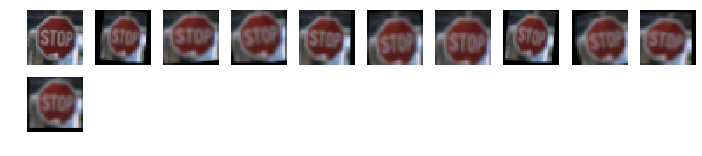

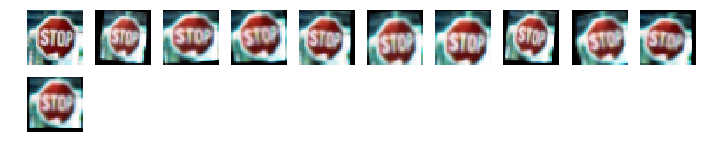

In [23]:
def apply_perturbation(myimg, ang_range, shear_range, trans_range, brightness):
    img = myimg
    img = rotate_image(img, ang_range=30)
    img = shear_image(img, shear_range=5)
    ## translation is causing an issue. Will not do this.
    img = translate_image(img, trans_range=5) 
    ## check whether image is dark
    img_mean  = np.mean(img) 
    darkthreshold = 40
    if brightness==True:
        if img_mean > darkthreshold:
            # img = alter_brightness(img)
            pass
        else: 
            img = brighten_image(img)
    return img

def get_perturbations(myimg, num_perturbations):
    ##  keep the original for display
    perturbed_images = [ np.copy(myimg)]
    for i in range(num_perturbations - 1):
        ## lecun's paper had a range of [-15, +15] for the angular rotation
        ## shear range is 10
        ## translation range is 5
        p_img =  apply_perturbation(myimg, 30, 10, 5, brightness=True)
        perturbed_images.append(p_img)
    return perturbed_images
        
    
def showperturbations(myimage, num_perturbedimages):
    gs1 = gridspec.GridSpec(10, 10)
    gs1.update(wspace=0.01, hspace=0.02) # set the spacing between axes.
    plt.figure(figsize=(12,12))
    p_images = get_perturbations(myimage, num_perturbedimages)
    i = 0
    for img in p_images:
        ax1 = plt.subplot(gs1[i])
        ax1.set_xticklabels([])
        ax1.set_yticklabels([])
        ax1.set_aspect('equal')      
        
        ## Although, LeCun's paper says (-15, 15) for rotation, randomly perturbed in position 
        ## this method has only rotation, shear and translation
        
        ## img.shape should be (32,32, 3)
        ### print(img.shape)  
        plt.subplot(10,10,i+1)
        i += 1
        plt.imshow(img)
        plt.axis('off')
    plt.show()
    gs1.update(wspace=0.01, hspace=0.02) # set the spacing between axes.
    plt.figure(figsize=(12,12))
    
    i = 0
    for img in p_images:
        ax1 = plt.subplot(gs1[i])
        ax1.set_xticklabels([])
        ax1.set_yticklabels([])
        ax1.set_aspect('equal')      
        
        ## Although, LeCun's paper says (-15, 15) for rotation, randomly perturbed in position 
        ## this method has only rotation, shear and translation
        
        ## img.shape should be (32,32, 3)
        ### print(img.shape)  
        plt.subplot(10,10,i+1)
        i += 1
        #imgcopy = np.copy(img)
        #imgcopy = preprocess_image(imgcopy)
        img = preprocess_image(img)
        plt.imshow(img)
        plt.axis('off')
    plt.show()

print('maxperturbations = ', maxperturb )
someindex = random.randint(0, n_train)
someimage = train['features'][someindex].squeeze()
showperturbations(someimage, maxperturb)

In [24]:
## JH: append the training set with more of these perturbations
## JH: prior to perturbations, the accuracy on the validation set was 91% with 20 epochs

## equalize the frequencies of the training data for all classes
## attempt 1: Add 5 additional perturbations per image, without worrying about overall distributions

## augmentation code courtesy https://github.com/TrW236/TrafficSignClassification
## for helping out with the numpy way of adding matrix elements
def augment_data(X_train, y_train, nclasses, num_perturbations, limit = UPPERLIMIT):
    aug_X = []
    aug_y = []
    y_freqcount = [0] * n_classes
    for x, y in zip(X_train, y_train):
        ## check whether this class has breached the upperlimit
        ## filling up the whitespace
        currfreq = np.sum(y_train == y) + y_freqcount[y]
        imagesadded = 0
        if currfreq < limit:
            ## add the perturbations here
            imagesadded = num_perturbations 
            newimgs = get_perturbations(x, imagesadded)   ## possibly, 10 images
        else:
            ## add just a single perturbation to keep the original image
            imagesadded = 1
            newimgs = get_perturbations(x, imagesadded) ## will return two images
            
        y_freqcount[y] += imagesadded ## - 1  adding the raw image and the perturbations
        aug_X.append(newimgs)
        y_list = np.repeat([y], (imagesadded))  ## either 1 image added or imagesadded-1
        aug_y.append(y_list)
     
    ## create a larger matrix with all the elements
    aug_X = np.concatenate(aug_X)
    aug_y = np.concatenate(aug_y)
    print('aug_X = ', aug_X.shape)
    print('aug_y = ', aug_y.shape)
    return aug_X, aug_y
        
#maxperturb = 2

In [25]:
## plot some random elements from the new training set and check
def plot_random(n_row,n_col,X,y):

    plt.figure(figsize = (11,8))
    gs1 = gridspec.GridSpec(n_row,n_row)
    gs1.update(wspace=0.01, hspace=0.02) # set the spacing between axes.

    for i in range(n_row*n_col):
        # i = i + 1 # grid spec indexes from 0
        ax1 = plt.subplot(gs1[i])
        plt.axis('on')
        ax1.set_xticklabels([])
        ax1.set_yticklabels([])
        ax1.set_aspect('equal')
        #plt.subplot(4,11,i+1)
        ind_plot = np.random.randint(1,len(y))
        plt.imshow(X[ind_plot])
        plt.text(2,4,str(y[ind_plot]),
             color='k',backgroundcolor='c')
        plt.axis('off')
    plt.show()

In [ ]:
### Oversampling to increase the underrepresented class labels.

from imblearn.over_sampling import RandomOverSampler
import numpy as np

dataset_size = len(X_train)
X_train = X_train.reshape(dataset_size,-2)
print(X_train.shape)
print(X_train[0].shape)
ros = RandomOverSampler()
X_resampled,y_resampled = ros.fit_sample(X_train,y_train)
print(X_resampled.shape)
print(y_resampled.shape)
dataset_size = len(X_train)
X_train = np.reshape(X_resampled,(86430,32,32,3))
#X_train = X_resampled.reshape(32,32,3)
y_train = y_resampled
print(X_train.shape)
print(X_train[0].shape)

In [ ]:
# Visualise the oversampled Train dataset

import matplotlib.pyplot as plt
from collections import Counter

labels = y_train
c = Counter(labels)
print (c.items())

signal=[]
count = []

for v in c.values():
    count.append([v])

for w in c.keys():
    signal.append ([w])

plt.plot(signal,count)
plt.show()

def display_data(y_train, n_class):
    counts = []
    for i in range(n_class):
        counts.append(np.sum(y_train == i))
    plt.bar(range(43),counts)
    
print('before augmentation...')    
display_data(y_train, 43)

In [ ]:
import cv2
import matplotlib.gridspec as gridspec

def normalize(img):
    imgnorm = (img.astype(np.float32) - 128.0)/128.0
    return imgnorm

def preprocess_image(myimg):
    ## a different trick to the one usually employed
    img = np.copy(myimg)
    img[:,:,0] = improve_image(img[:,:,0]) ## equalize all channels
    img[:,:,1] = improve_image(img[:,:,1]) 
    img[:,:,2] = improve_image(img[:,:,2]) 
    return img

def improve_image(img):
    newimg = cv2.equalizeHist(img)
    return newimg

def preprocess_all(imgs, norm=True):
    output = []
    
    for img in imgs:
        imgpreprocessed = preprocess_image(img)
        if norm:
            imgnew = normalize(imgpreprocessed)
        else:
            imgnew = imgpreprocessed
        output.append(imgnew)
    output = np.array(output)
    print('shape after being preprocessed = ', output.shape)
    return output

----

## Step 2: Design and Test a Model Architecture

Design and implement a deep learning model that learns to recognize traffic signs. Train and test your model on the [German Traffic Sign Dataset](http://benchmark.ini.rub.de/?section=gtsrb&subsection=dataset).

The LeNet-5 implementation shown in the [classroom](https://classroom.udacity.com/nanodegrees/nd013/parts/fbf77062-5703-404e-b60c-95b78b2f3f9e/modules/6df7ae49-c61c-4bb2-a23e-6527e69209ec/lessons/601ae704-1035-4287-8b11-e2c2716217ad/concepts/d4aca031-508f-4e0b-b493-e7b706120f81) at the end of the CNN lesson is a solid starting point. You'll have to change the number of classes and possibly the preprocessing, but aside from that it's plug and play! 

With the LeNet-5 solution from the lecture, you should expect a validation set accuracy of about 0.89. To meet specifications, the validation set accuracy will need to be at least 0.93. It is possible to get an even higher accuracy, but 0.93 is the minimum for a successful project submission. 

There are various aspects to consider when thinking about this problem:

- Neural network architecture (is the network over or underfitting?)
- Play around preprocessing techniques (normalization, rgb to grayscale, etc)
- Number of examples per label (some have more than others).
- Generate fake data.

Here is an example of a [published baseline model on this problem](http://yann.lecun.com/exdb/publis/pdf/sermanet-ijcnn-11.pdf). It's not required to be familiar with the approach used in the paper but, it's good practice to try to read papers like these.

### Pre-process the Data Set (normalization, grayscale, etc.)

Minimally, the image data should be normalized so that the data has mean zero and equal variance. For image data, `(pixel - 128)/ 128` is a quick way to approximately normalize the data and can be used in this project. 

Other pre-processing steps are optional. You can try different techniques to see if it improves performance. 

Use the code cell (or multiple code cells, if necessary) to implement the first step of your project.

aug_X =  (81909, 32, 32, 3)
aug_y =  (81909,)
(81909, 32, 32, 3)
32 32 3
51


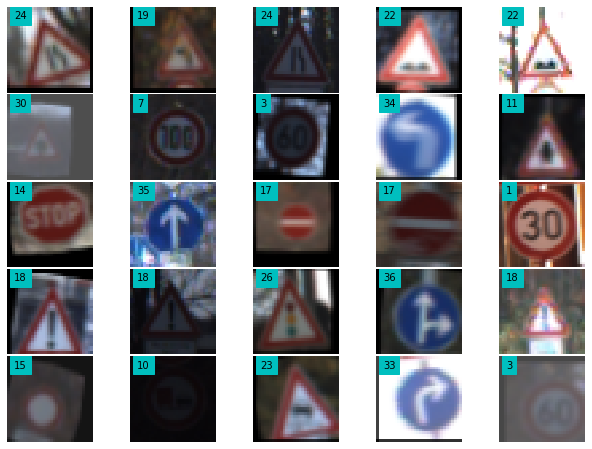

In [26]:
from sklearn.utils import shuffle

X_train, y_train = augment_data(X_train, y_train, n_classes, maxperturb, UPPERLIMIT)
X_train, y_train = shuffle(X_train, y_train)

print(X_train.shape)


rows = image.shape[0]
cols = image.shape[1]
colours = image.shape[2]
print(rows, cols, colours)

## JH: use np.array indices
a = X_train[0, 0, 0, 1]
print(a)
plot_random(5, 5, X_train, y_train)

(32, 32, 3)
shape after being preprocessed =  (81909, 32, 32, 3)
shape after being preprocessed =  (4410, 32, 32, 3)
shape after being preprocessed =  (12630, 32, 32, 3)
-1.0
0.9921875 -1.0
0.9921875 -1.0
0.9921875 -1.0
after augmentation, after processing...


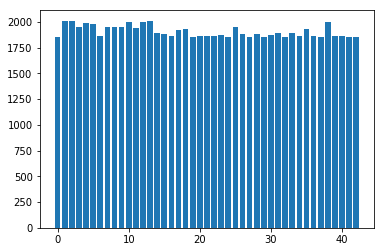

In [27]:
from skimage import color

print(X_train[0].shape)
X_train = preprocess_all(X_train)
X_valid = preprocess_all(X_valid)
X_test = preprocess_all(X_test)

## this works too.  
#X_train = (X_train - 128.0)/128.0
#X_valid = (X_valid - 128.0)/128.0
#X_test = (X_test - 128.0)/128.0

## JH: just to test
a = X_train[0, 0, 0, 1]

print(a)
### just checking the range of values
print(np.max(X_train), np.min(X_train))
print(np.max(X_valid), np.min(X_valid))
print(np.max(X_test), np.min(X_test))


print('after augmentation, after processing...')    
display_data(y_train, 43)


Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping i

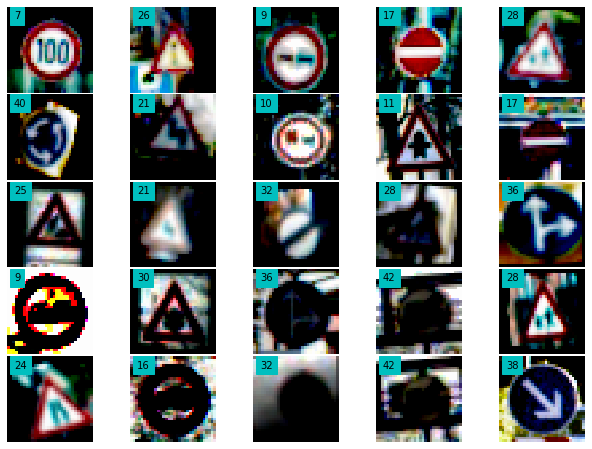

In [28]:
plot_random(5, 5, X_train, y_train)

############################################## Bis hier funktioniert es

In [ ]:
### Preprocess the data here. It is required to normalize the data. Other preprocessing steps could include 
### converting to grayscale, etc.
### Feel free to use as many code cells as needed.

from keras.preprocessing.image import ImageDataGenerator
from matplotlib import pyplot
datagen = ImageDataGenerator(zca_whitening=True)
datagen.fit(X_train)
for X_batch,Y_batch in datagen.flow(X_train,y_train,batch_size=9):
    for i in range(0,9):
        pyplot.subplot(330+1+i)
        pyplot.imshow(X_batch[i])
    pyplot.show()
    break

In [ ]:
### Data set normaliztion within a range of 0 to 1
from sklearn.utils import shuffle
X_train, y_train = shuffle(X_train, y_train)
X_train = X_train/255
X_valid = X_valid/255
X_test = X_test/255

print(X_train[2].shape)
print(X_train.shape, X_test.shape)

from sklearn.utils import shuffle
X_train, y_train = shuffle(X_train, y_train)
X_test, y_test = shuffle(X_test, y_test)

### Model Architecture

In [29]:
### Define your architecture here.
### Feel free to use as many code cells as needed.

### Setup epoch and Batch-size

from keras.layers import Dense, Dropout, Activation, Flatten
from keras.layers import Convolution2D, MaxPooling2D
from keras.models import Sequential
from keras.preprocessing.image import ImageDataGenerator
from keras.utils import np_utils
import tensorflow as tf
EPOCHS = 20
BATCH_SIZE = 32
CLASSES = 43
keep_prob = tf.placeholder(tf.float32, name='keep_prob')

Using TensorFlow backend.


### Train, Validate and Test the Model

A validation set can be used to assess how well the model is performing. A low accuracy on the training and validation
sets imply underfitting. A high accuracy on the training set but low accuracy on the validation set implies overfitting.

In [30]:
### Train your model here.
### Calculate and report the accuracy on the training and validation set.
### Once a final model architecture is selected, 
### the accuracy on the test set should be calculated and reported as well.
### Feel free to use as many code cells as needed.


from tensorflow.contrib.layers import flatten


def LeNet(x):    
    # Arguments used for tf.truncated_normal, randomly defines variables for the weights and biases for each layer
    mu = 0
    sigma = 0.1
    
    # SOLUTION: Layer 1: Convolutional. Input = 32x32x1. Output = 28x28x6.
    conv1_W = tf.Variable(tf.truncated_normal(shape=(5, 5, 3, 6), mean = mu, stddev = sigma))
    conv1_b = tf.Variable(tf.zeros(6))
    conv1   = tf.nn.conv2d(x, conv1_W, strides=[1, 1, 1, 1], padding='VALID') + conv1_b

    # SOLUTION: Activation.
    conv1 = tf.nn.relu(conv1)

    # SOLUTION: Pooling. Input = 28x28x6. Output = 14x14x6.
    conv1 = tf.nn.max_pool(conv1, ksize=[1, 2, 2, 1], strides=[1, 2, 2, 1], padding='VALID')

    # SOLUTION: Layer 2: Convolutional. Output = 10x10x16.
    conv2_W = tf.Variable(tf.truncated_normal(shape=(5, 5, 6, 16), mean = mu, stddev = sigma))
    conv2_b = tf.Variable(tf.zeros(16))
    conv2   = tf.nn.conv2d(conv1, conv2_W, strides=[1, 1, 1, 1], padding='VALID') + conv2_b
    
    # SOLUTION: Activation.
    conv2 = tf.nn.relu(conv2)

    # SOLUTION: Pooling. Input = 10x10x16. Output = 5x5x16.
    conv2 = tf.nn.max_pool(conv2, ksize=[1, 2, 2, 1], strides=[1, 2, 2, 1], padding='VALID')

    # SOLUTION: Flatten. Input = 5x5x16. Output = 400.
    fc0   = flatten(conv2)
    
    # SOLUTION: Layer 3: Fully Connected. Input = 400. Output = 120.
    fc1_W = tf.Variable(tf.truncated_normal(shape=(400, 120), mean = mu, stddev = sigma))
    fc1_b = tf.Variable(tf.zeros(120))
    fc1   = tf.matmul(fc0, fc1_W) + fc1_b
    
    # SOLUTION: Activation.
    fc1    = tf.nn.relu(fc1)

    # SOLUTION: Layer 4: Fully Connected. Input = 120. Output = 84.
    fc2_W  = tf.Variable(tf.truncated_normal(shape=(120, 84), mean = mu, stddev = sigma))
    fc2_b  = tf.Variable(tf.zeros(84))
    fc2    = tf.matmul(fc1, fc2_W) + fc2_b
    
    # SOLUTION: Activation.
    fc2    = tf.nn.relu(fc2)

    # SOLUTION: Layer 5: Fully Connected. Input = 84. Output = 10.
    fc3_W  = tf.Variable(tf.truncated_normal(shape=(84, 43), mean = mu, stddev = sigma))
    fc3_b  = tf.Variable(tf.zeros(43))
    logits = tf.matmul(fc2, fc3_W) + fc3_b
    
    return logits

In [31]:
x = tf.placeholder(tf.float32, (None, 32, 32, 3), name='X')
y = tf.placeholder(tf.int32, (None), name='y')
one_hot_y = tf.one_hot(y, 43)
print(image_shape[0])
print(image_shape[1])

32
32


In [32]:
rate = 0.001

logits = LeNet(x)
cross_entropy = tf.nn.softmax_cross_entropy_with_logits(labels=one_hot_y, logits=logits)
loss_operation = tf.reduce_mean(cross_entropy)
optimizer = tf.train.AdamOptimizer(learning_rate = rate)
training_operation = optimizer.minimize(loss_operation)

In [33]:
correct_prediction = tf.equal(tf.argmax(logits, 1), tf.argmax(one_hot_y, 1))
accuracy_operation = tf.reduce_mean(tf.cast(correct_prediction, tf.float32))
saver = tf.train.Saver()

def evaluate(X_data, y_data):
    num_examples = len(X_data)
    total_accuracy = 0
    sess = tf.get_default_session()
    for offset in range(0, num_examples, BATCH_SIZE):
        batch_x, batch_y = X_data[offset:offset+BATCH_SIZE], y_data[offset:offset+BATCH_SIZE]
        accuracy = sess.run(accuracy_operation, feed_dict={x: batch_x, y: batch_y, keep_prob:1.0})
        total_accuracy += (accuracy * len(batch_x))
    return total_accuracy / num_examples

In [34]:
from random import shuffle

with tf.Session() as sess:
    sess.run(tf.global_variables_initializer())
    num_examples = len(X_train)
    
    print("Training...")
    print()
    for i in range(EPOCHS):
        # X_train, y_train = shuffle(X_train, y_train)
        for offset in range(0, num_examples, BATCH_SIZE):
            end = offset + BATCH_SIZE
            batch_x, batch_y = X_train[offset:end], y_train[offset:end]
            sess.run(training_operation, feed_dict={x: batch_x, y: batch_y, keep_prob: 0.5})
            
        validation_accuracy = evaluate(X_valid, y_valid)
        print("EPOCH {} ...".format(i+1))
        print("Validation Accuracy = {:.3f}".format(validation_accuracy))
        print()
        
    saver.save(sess, './lenet')
    print("Model saved")

Training...

EPOCH 1 ...
Validation Accuracy = 0.887

EPOCH 2 ...
Validation Accuracy = 0.911

EPOCH 3 ...
Validation Accuracy = 0.925

EPOCH 4 ...
Validation Accuracy = 0.929

EPOCH 5 ...
Validation Accuracy = 0.931

EPOCH 6 ...
Validation Accuracy = 0.929

EPOCH 7 ...
Validation Accuracy = 0.931

EPOCH 8 ...
Validation Accuracy = 0.925

EPOCH 9 ...
Validation Accuracy = 0.931

EPOCH 10 ...
Validation Accuracy = 0.938

EPOCH 11 ...
Validation Accuracy = 0.930

EPOCH 12 ...
Validation Accuracy = 0.932

EPOCH 13 ...
Validation Accuracy = 0.940

EPOCH 14 ...
Validation Accuracy = 0.942

EPOCH 15 ...
Validation Accuracy = 0.933

EPOCH 16 ...
Validation Accuracy = 0.944

EPOCH 17 ...
Validation Accuracy = 0.933

EPOCH 18 ...
Validation Accuracy = 0.940

EPOCH 19 ...
Validation Accuracy = 0.934

EPOCH 20 ...
Validation Accuracy = 0.940

Model saved


In [35]:
with tf.Session() as sess:
    saver.restore(sess, tf.train.latest_checkpoint('.'))

    test_accuracy = evaluate(X_test, y_test)
    print("Test Accuracy = {:.3f}".format(test_accuracy))

INFO:tensorflow:Restoring parameters from .\lenet
Test Accuracy = 0.916


---

## Step 3: Test a Model on New Images

To give yourself more insight into how your model is working, download at least five pictures of German traffic signs from the web and use your model to predict the traffic sign type.

You may find `signnames.csv` useful as it contains mappings from the class id (integer) to the actual sign name.

### Load and Output the Images

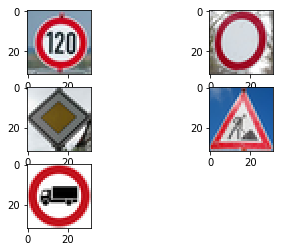

In [36]:
###Load the new images and plot it

from os import listdir
from PIL import Image as PImage
from matplotlib import pyplot as plt

def loadImages(path):
    # return array of images

    imagesList = listdir(path)
    loadedImages = []
    basewidth = 32
    hsize = 32
    for image in imagesList:
        img = PImage.open(path + image)
        img = img.resize((basewidth,hsize),PImage.ANTIALIAS)
        loadedImages.append(img)

    return loadedImages

path = ".\\images\\"

# your images in an array
imgs = loadImages(path)

# Visualizations will be shown in the notebook.
%matplotlib inline

plt.subplot(321)
plt.imshow(imgs[0])

plt.subplot(322)
plt.imshow(imgs[1])

plt.subplot(323)
plt.imshow(imgs[2])

plt.subplot(324)
plt.imshow(imgs[3])

plt.subplot(325)
plt.imshow(imgs[4])

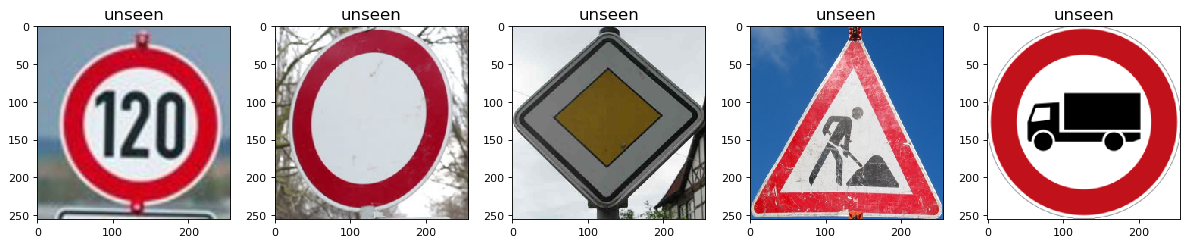

In [48]:
### Load the images and plot them here.
### Feel free to use as many code cells as needed.

def show_stuff(myimgs, n, captions=None):
    figure, axis = plt.subplots(1, n, figsize=(15, 5), dpi=80)
    if captions == None: 
        captions = ['unseen']*n
    for i in range(n):
        axis[i].imshow(myimgs[i], cmap=None)
        axis[i].set_title(captions[i], fontsize=15)
    figure.tight_layout()
        

import glob
import matplotlib.image as mpimg
unseen_image_files = glob.glob('./images/*png')
raw_unseen = []

num_unseen_files = len(unseen_image_files)
for i in range(num_unseen_files):
    u_image = mpimg.imread(unseen_image_files[i])
    u_image = cv2.resize(u_image, (256,256)) ## resize it to 32x32 straight away
    raw_unseen.append(u_image)
    
show_stuff(raw_unseen, len(raw_unseen))

error: OpenCV(4.0.0) c:\projects\opencv-python\opencv\modules\imgproc\src\color.hpp:259: error: (-2:Unspecified error) in function '__cdecl cv::CvtHelper<struct cv::Set<3,4,-1>,struct cv::Set<1,-1,-1>,struct cv::Set<0,2,5>,2>::CvtHelper(const class cv::_InputArray &,const class cv::_OutputArray &,int)'
> Invalid number of channels in input image:
>     'VScn::contains(scn)'
> where
>     'scn' is 1


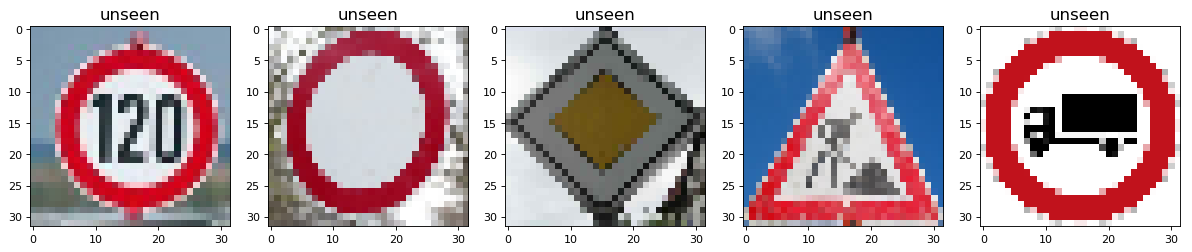

In [53]:
## clean it up 
## preprocess 
prep_images = []
for i in range(len(raw_unseen)):
    prep_images.append(cv2.resize(raw_unseen[i], (32, 32)))

show_stuff(prep_images, len(prep_images))

prep_images = preprocess_all(prep_images)

### Predict the Sign Type for Each Image

In [44]:
### Run the predictions here and use the model to output the prediction for each image.
### Make sure to pre-process the images with the same pre-processing pipeline used earlier.
### Feel free to use as many code cells as needed.
with tf.Session() as sess:
    saver.restore(sess, tf.train.latest_checkpoint('.'))
    arrcoll = tf.get_collection('inp')
    print(len(arrcoll))
    X, y, keep_prob = arrcoll
    mylogits = tf.get_collection('logits')[0]
    results = sess.run(tf.nn.top_k(tf.nn.softmax(mylogits), k=5), feed_dict={X: prep_images, keep_prob:1.0})

print("results.values = ", results.values)
print('results.indices = ', results.indices)

INFO:tensorflow:Restoring parameters from .\lenet
0


ValueError: not enough values to unpack (expected 3, got 0)

### Analyze Performance

In [45]:
import pandas as pd
signnames = pd.read_csv('signnames.csv')
print(len(signnames))
signnames.head(15)
## print(dir(signnames.iloc))

43


,ClassId,SignName
0,0,Speed limit (20km/h)
1,1,Speed limit (30km/h)
2,2,Speed limit (50km/h)
3,3,Speed limit (60km/h)
4,4,Speed limit (70km/h)
5,5,Speed limit (80km/h)
6,6,End of speed limit (80km/h)
7,7,Speed limit (100km/h)
8,8,Speed limit (120km/h)
9,9,No passing


In [46]:
### Calculate the accuracy for these 5 new images. 
### For example, if the model predicted 1 out of 5 signs correctly, it's 20% accurate on these new images.

def show_predictions(test_pics, probabilities, predictions):
    n = len(test_pics)
    fig, ax = plt.subplots(n, 2, figsize=(15,15))
    
    for i in range(n) :
        labels = pred[i]
        names = [signnames.iloc[l]['SignName'] for l in labels]
        bars = np.arange(5)[::-1]
        ax[i,0].imshow(test_pics[i])
        ax[i,0].axis('off')
        ax[i,1].barh(bars, prob[i])
        ax[i,1].set_yticks(bars)
        ax[i,1].set_yticklabels(names)
        ax[i,1].yaxis.tick_right()
        ax[i,1].set_xlim([0,1])
    fig.tight_layout()

In [47]:
prob = results[0]
pred = results[1]
show_predictions(raw_unseen, prob, pred)

NameError: name 'results' is not defined

### Output Top 5 Softmax Probabilities For Each Image Found on the Web

For each of the new images, print out the model's softmax probabilities to show the **certainty** of the model's predictions (limit the output to the top 5 probabilities for each image). [`tf.nn.top_k`](https://www.tensorflow.org/versions/r0.12/api_docs/python/nn.html#top_k) could prove helpful here. 

The example below demonstrates how tf.nn.top_k can be used to find the top k predictions for each image.

`tf.nn.top_k` will return the values and indices (class ids) of the top k predictions. So if k=3, for each sign, it'll return the 3 largest probabilities (out of a possible 43) and the correspoding class ids.

Take this numpy array as an example. The values in the array represent predictions. The array contains softmax probabilities for five candidate images with six possible classes. `tf.nn.top_k` is used to choose the three classes with the highest probability:

```
# (5, 6) array
a = np.array([[ 0.24879643,  0.07032244,  0.12641572,  0.34763842,  0.07893497,
         0.12789202],
       [ 0.28086119,  0.27569815,  0.08594638,  0.0178669 ,  0.18063401,
         0.15899337],
       [ 0.26076848,  0.23664738,  0.08020603,  0.07001922,  0.1134371 ,
         0.23892179],
       [ 0.11943333,  0.29198961,  0.02605103,  0.26234032,  0.1351348 ,
         0.16505091],
       [ 0.09561176,  0.34396535,  0.0643941 ,  0.16240774,  0.24206137,
         0.09155967]])
```

Running it through `sess.run(tf.nn.top_k(tf.constant(a), k=3))` produces:

```
TopKV2(values=array([[ 0.34763842,  0.24879643,  0.12789202],
       [ 0.28086119,  0.27569815,  0.18063401],
       [ 0.26076848,  0.23892179,  0.23664738],
       [ 0.29198961,  0.26234032,  0.16505091],
       [ 0.34396535,  0.24206137,  0.16240774]]), indices=array([[3, 0, 5],
       [0, 1, 4],
       [0, 5, 1],
       [1, 3, 5],
       [1, 4, 3]], dtype=int32))
```

Looking just at the first row we get `[ 0.34763842,  0.24879643,  0.12789202]`, you can confirm these are the 3 largest probabilities in `a`. You'll also notice `[3, 0, 5]` are the corresponding indices.

In [ ]:
### Print out the top five softmax probabilities for the predictions on the German traffic sign images found on the web. 
### Feel free to use as many code cells as needed.

### Project Writeup

Once you have completed the code implementation, document your results in a project writeup using this [template](https://github.com/udacity/CarND-Traffic-Sign-Classifier-Project/blob/master/writeup_template.md) as a guide. The writeup can be in a markdown or pdf file. 

> **Note**: Once you have completed all of the code implementations and successfully answered each question above, you may finalize your work by exporting the iPython Notebook as an HTML document. You can do this by using the menu above and navigating to  \n",
    "**File -> Download as -> HTML (.html)**. Include the finished document along with this notebook as your submission.

---

## Step 4 (Optional): Visualize the Neural Network's State with Test Images

 This Section is not required to complete but acts as an additional excersise for understaning the output of a neural network's weights. While neural networks can be a great learning device they are often referred to as a black box. We can understand what the weights of a neural network look like better by plotting their feature maps. After successfully training your neural network you can see what it's feature maps look like by plotting the output of the network's weight layers in response to a test stimuli image. From these plotted feature maps, it's possible to see what characteristics of an image the network finds interesting. For a sign, maybe the inner network feature maps react with high activation to the sign's boundary outline or to the contrast in the sign's painted symbol.

 Provided for you below is the function code that allows you to get the visualization output of any tensorflow weight layer you want. The inputs to the function should be a stimuli image, one used during training or a new one you provided, and then the tensorflow variable name that represents the layer's state during the training process, for instance if you wanted to see what the [LeNet lab's](https://classroom.udacity.com/nanodegrees/nd013/parts/fbf77062-5703-404e-b60c-95b78b2f3f9e/modules/6df7ae49-c61c-4bb2-a23e-6527e69209ec/lessons/601ae704-1035-4287-8b11-e2c2716217ad/concepts/d4aca031-508f-4e0b-b493-e7b706120f81) feature maps looked like for it's second convolutional layer you could enter conv2 as the tf_activation variable.

For an example of what feature map outputs look like, check out NVIDIA's results in their paper [End-to-End Deep Learning for Self-Driving Cars](https://devblogs.nvidia.com/parallelforall/deep-learning-self-driving-cars/) in the section Visualization of internal CNN State. NVIDIA was able to show that their network's inner weights had high activations to road boundary lines by comparing feature maps from an image with a clear path to one without. Try experimenting with a similar test to show that your trained network's weights are looking for interesting features, whether it's looking at differences in feature maps from images with or without a sign, or even what feature maps look like in a trained network vs a completely untrained one on the same sign image.

<figure>
 <img src="visualize_cnn.png" width="380" alt="Combined Image" />
 <figcaption>
 <p></p> 
 <p style="text-align: center;"> Your output should look something like this (above)</p> 
 </figcaption>
</figure>
 <p></p> 


In [ ]:
### Visualize your network's feature maps here.
### Feel free to use as many code cells as needed.

# image_input: the test image being fed into the network to produce the feature maps
# tf_activation: should be a tf variable name used during your training procedure that represents the calculated state of a specific weight layer
# activation_min/max: can be used to view the activation contrast in more detail, by default matplot sets min and max to the actual min and max values of the output
# plt_num: used to plot out multiple different weight feature map sets on the same block, just extend the plt number for each new feature map entry

def outputFeatureMap(image_input, tf_activation, activation_min=-1, activation_max=-1 ,plt_num=1):
    # Here make sure to preprocess your image_input in a way your network expects
    # with size, normalization, ect if needed
    # image_input =
    # Note: x should be the same name as your network's tensorflow data placeholder variable
    # If you get an error tf_activation is not defined it may be having trouble accessing the variable from inside a function
    activation = tf_activation.eval(session=sess,feed_dict={x : image_input})
    featuremaps = activation.shape[3]
    plt.figure(plt_num, figsize=(15,15))
    for featuremap in range(featuremaps):
        plt.subplot(6,8, featuremap+1) # sets the number of feature maps to show on each row and column
        plt.title('FeatureMap ' + str(featuremap)) # displays the feature map number
        if activation_min != -1 & activation_max != -1:
            plt.imshow(activation[0,:,:, featuremap], interpolation="nearest", vmin =activation_min, vmax=activation_max, cmap="gray")
        elif activation_max != -1:
            plt.imshow(activation[0,:,:, featuremap], interpolation="nearest", vmax=activation_max, cmap="gray")
        elif activation_min !=-1:
            plt.imshow(activation[0,:,:, featuremap], interpolation="nearest", vmin=activation_min, cmap="gray")
        else:
            plt.imshow(activation[0,:,:, featuremap], interpolation="nearest", cmap="gray")